# Pandas and Datetime Hints

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('../programming_1/data/noaa_goes12_xrs_1m.csv')

In [3]:
df.head()

,time (yyyy-MM-dd'T'HH:mm:ss),shortwave (W/m^2),longwave (W/m^2)
0,2003-10-24T00:00:00,2.630000e-07,0.000005
1,2003-10-24T00:01:00,2.500000e-07,0.000005
2,2003-10-24T00:02:00,2.440000e-07,0.000005
3,2003-10-24T00:03:00,2.400000e-07,0.000005
4,2003-10-24T00:04:00,2.370000e-07,0.000005


In [4]:
# Note: you can also see the last lines!
df.tail()

,time (yyyy-MM-dd'T'HH:mm:ss),shortwave (W/m^2),longwave (W/m^2)
10076,2003-10-30T23:56:00,1.410000e-07,0.000003
10077,2003-10-30T23:57:00,1.440000e-07,0.000003
10078,2003-10-30T23:58:00,1.420000e-07,0.000003
10079,2003-10-30T23:59:00,1.410000e-07,0.000003
10080,2003-10-31T00:00:00,1.450000e-07,0.000003


## Hint 1: Why the suspicious value at -100000

<AxesSubplot:xlabel="time (yyyy-MM-dd'T'HH:mm:ss)">

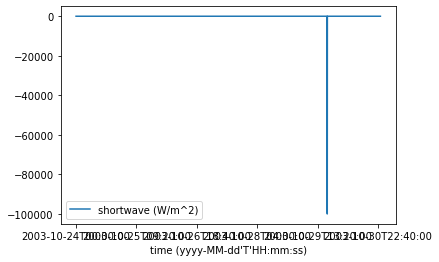

In [5]:
df.plot("time (yyyy-MM-dd'T'HH:mm:ss)", 'shortwave (W/m^2)')

**How do you get rid of it?**

In [6]:
df = df[df['shortwave (W/m^2)'] != -100000]

# To reset indices, run reset_index with inplace=True
df.reset_index(inplace=True, drop=True)

# This shows the last 5 rows, notice the indices have changed
df.tail(5)

,time (yyyy-MM-dd'T'HH:mm:ss),shortwave (W/m^2),longwave (W/m^2)
10070,2003-10-30T23:56:00,1.410000e-07,0.000003
10071,2003-10-30T23:57:00,1.440000e-07,0.000003
10072,2003-10-30T23:58:00,1.420000e-07,0.000003
10073,2003-10-30T23:59:00,1.410000e-07,0.000003
10074,2003-10-31T00:00:00,1.450000e-07,0.000003


## Hint 2: Advantages of datetime

<AxesSubplot:xlabel="time (yyyy-MM-dd'T'HH:mm:ss)">

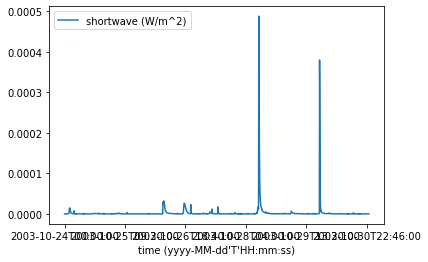

In [7]:
df.plot("time (yyyy-MM-dd'T'HH:mm:ss)", 'shortwave (W/m^2)')

Ewwwww...bad axis labels!

In [8]:
df['datetime'] = pd.to_datetime(df["time (yyyy-MM-dd\'T\'HH:mm:ss)"])

<ipython-input-8-437ab8c674c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df["time (yyyy-MM-dd\'T\'HH:mm:ss)"])


In [9]:
df.head()

,time (yyyy-MM-dd'T'HH:mm:ss),shortwave (W/m^2),longwave (W/m^2),datetime
0,2003-10-24T00:00:00,2.630000e-07,0.000005,2003-10-24 00:00:00
1,2003-10-24T00:01:00,2.500000e-07,0.000005,2003-10-24 00:01:00
2,2003-10-24T00:02:00,2.440000e-07,0.000005,2003-10-24 00:02:00
3,2003-10-24T00:03:00,2.400000e-07,0.000005,2003-10-24 00:03:00
4,2003-10-24T00:04:00,2.370000e-07,0.000005,2003-10-24 00:04:00


<AxesSubplot:xlabel='datetime'>

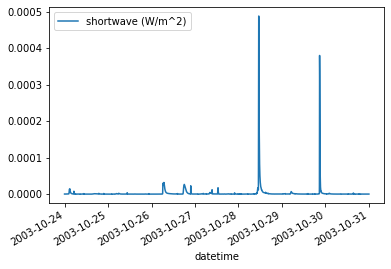

In [10]:
df.plot("datetime", 'shortwave (W/m^2)')

**Pretty x-axis!** We can also perform more mathematics on a datetime, such as find a time delta between the first and last rows.

In [11]:
# iloc[-1] is the last row, iloc[0] is the first
time_delt = df['datetime'].iloc[-1] - df['datetime'].iloc[0]
print(time_delt)

7 days 00:00:00


In [12]:
# Want it in seconds?
time_delt.total_seconds()

604800.0